In [1]:
#Logistic Regression (RFE)
#Source (mainly for ROC): https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\rampa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
df = pd.read_csv("../csvs/salm_up2.csv")
df.head()

,Illnesses,Hospitalizations,Deaths,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,3,4,5,6,7,8,9,10,11,12
0,2,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#drop our classifier, Hopitilizations, this (X) will be used in our test set
X = df.drop(['Hospitalizations'], axis = 1)
X.head()

,Illnesses,Deaths,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,3,4,5,6,7,8,9,10,11,12
0,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# y is what we want to predict, Hospitilizations
y = df['Hospitalizations']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Hospitalizations, dtype: float64

In [6]:
#RFE analysis
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False  True False False
 False  True False False False False False False Fa

In [7]:
#Finding the name of the column indicated by RFE
df.iloc[:, 103]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    0
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    0
19978    0
19979    0
19980    0
19981    0
19982    0
19983    0
19984    0
19985    0
Name: Clostridium botulinum, Length: 19986, dtype: int64

In [8]:
df.iloc[:, 139]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    1
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    0
19978    0
19979    0
19980    0
19981    0
19982    0
19983    0
19984    1
19985    1
Name: Escherichia coli, Shiga toxin-producing, Length: 19986, dtype: int64

In [9]:
df.iloc[:, 154]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    0
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    0
19978    0
19979    1
19980    0
19981    0
19982    0
19983    0
19984    0
19985    0
Name: Listeria monocytogenes, Length: 19986, dtype: int64

In [10]:
df.iloc[:, 158]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    0
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    0
19978    0
19979    0
19980    0
19981    0
19982    0
19983    0
19984    0
19985    0
Name: Mycotoxins, Length: 19986, dtype: int64

In [11]:
df.iloc[:, 206]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    0
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    0
19978    0
19979    0
19980    0
19981    0
19982    0
19983    0
19984    0
19985    0
Name: Paralytic shellfish poison, Length: 19986, dtype: int64

In [12]:
df.iloc[:, 209]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    0
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    0
19978    0
19979    0
19980    0
19981    0
19982    0
19983    0
19984    0
19985    0
Name: Plant/Herbal toxins, Length: 19986, dtype: int64

In [13]:
df.iloc[:, 215]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       1
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    1
19959    0
19960    1
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    1
19978    1
19979    0
19980    1
19981    1
19982    0
19983    1
19984    0
19985    0
Name: Salmonella enterica, Length: 19986, dtype: int64

In [14]:
df.iloc[:, 229]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    0
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    1
19974    0
19975    0
19976    0
19977    0
19978    0
19979    0
19980    0
19981    0
19982    0
19983    0
19984    0
19985    0
Name: Salmonella enterica; Salmonella enterica, Length: 19986, dtype: int64

In [15]:
df.iloc[:, 231]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    0
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    0
19978    0
19979    0
19980    0
19981    0
19982    0
19983    0
19984    0
19985    0
Name: Salmonella enterica; Salmonella enterica; Salmonella enterica, Length: 19986, dtype: int64

In [16]:
df.iloc[:, 249]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19956    0
19957    0
19958    0
19959    0
19960    0
19961    0
19962    0
19963    0
19964    0
19965    0
19966    0
19967    0
19968    0
19969    0
19970    0
19971    0
19972    0
19973    0
19974    0
19975    0
19976    0
19977    0
19978    0
19979    0
19980    0
19981    0
19982    0
19983    0
19984    0
19985    0
Name: Shigella flexneri, Length: 19986, dtype: int64

In [17]:
#Preparing X and y for logistic regression
cols = ["Clostridium botulinum", "Escherichia coli, Shiga toxin-producing", "Listeria monocytogenes", "Mycotoxins", "Paralytic shellfish poison", 
        "Plant/Herbal toxins", "Salmonella enterica", "Salmonella enterica; Salmonella enterica", "Salmonella enterica; Salmonella enterica; Salmonella enterica", "Shigella flexneri"]
X = df[cols]
y = df['Hospitalizations']

In [18]:
#Logistic Regression
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

C:\Users\rampa\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


         Current function value: 0.682967
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       Hospitalizations   No. Observations:                19986
Model:                          Logit   Df Residuals:                    19976
Method:                           MLE   Df Model:                            9
Date:                Sat, 05 May 2018   Pseudo R-squ.:                 -0.3133
Time:                        13:38:53   Log-Likelihood:                -13650.
converged:                      False   LL-Null:                       -10394.
                                        LLR p-value:                     1.000
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Clostridium botulinum                     

C:\Users\rampa\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
#Train/test split on our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#Accuracy of train/test split 70/30
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [21]:
#K Folds Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.837


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4404  319]
 [ 671  602]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.87      0.93      0.90      4723
        1.0       0.65      0.47      0.55      1273

avg / total       0.82      0.83      0.82      5996



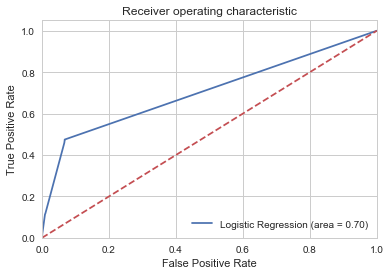

In [24]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()